In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data = pd.read_csv(r'C:\Users\begba\Desktop\Fraud_data_for_test6.csv')#load the data

In [11]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163710 entries, 0 to 163709
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Time      163710 non-null  int64  
 1   Country   163710 non-null  object 
 2   Value     163710 non-null  float64
 3   Currency  163710 non-null  object 
 4   Status    163710 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 6.2+ MB
None


In [12]:
print(data.head())

    Time Country  Value Currency             Status
0  25324       D  18.61       ML  Accepted No Fraud
1  41036       B  18.79       SH  Accepted No Fraud
2  24310       B  27.63       AD  Accepted No Fraud
3    948       D  16.92       ML  Accepted No Fraud
4   5280       A  26.54       AD  Accepted No Fraud


In [13]:
print(data.describe())#descriptive statistics for numerical columns

                Time          Value
count  163710.000000  163710.000000
mean    24949.465811      22.101443
std     14464.721250       7.416671
min         1.000000     -13.670000
25%     12471.250000      18.080000
50%     24826.500000      22.990000
75%     37547.750000      27.190000
max     49999.000000      45.470000


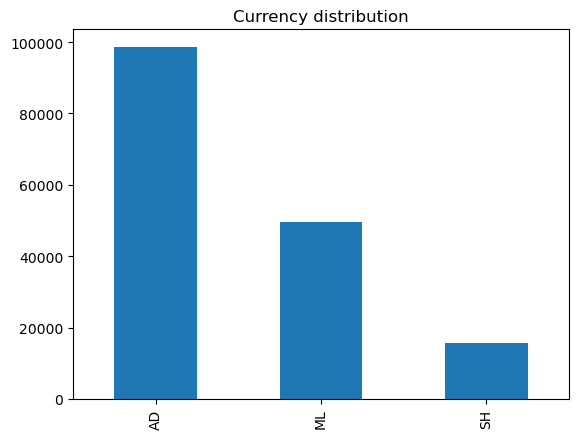

In [14]:
data['Currency'].value_counts().plot(kind='bar')#the count of occurrences for each unique currency type
plt.title('Currency distribution')
plt.show()


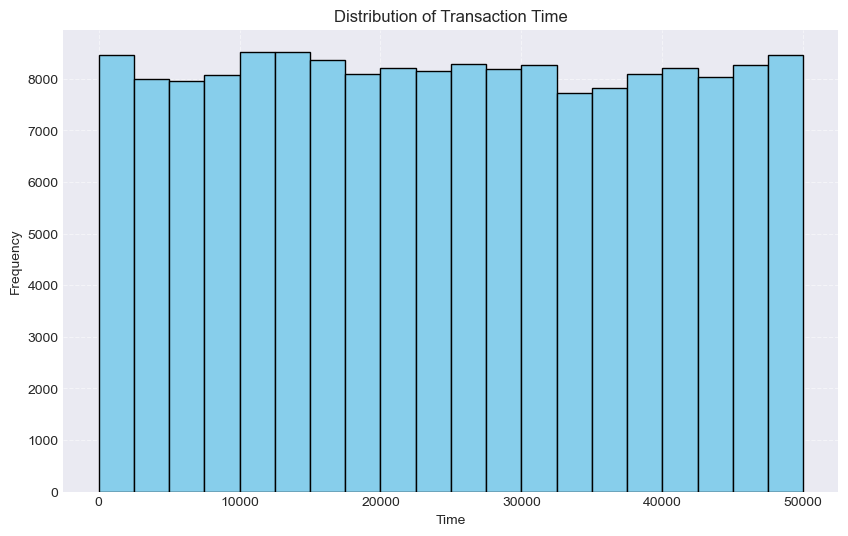

In [126]:
plt.figure(figsize=(10, 6))
plt.style.use('seaborn-darkgrid')

# Plotting the histogram
data['Time'].hist(bins=20, color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Distribution of Transaction Time')
plt.xlabel('Time')
plt.ylabel('Frequency')

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

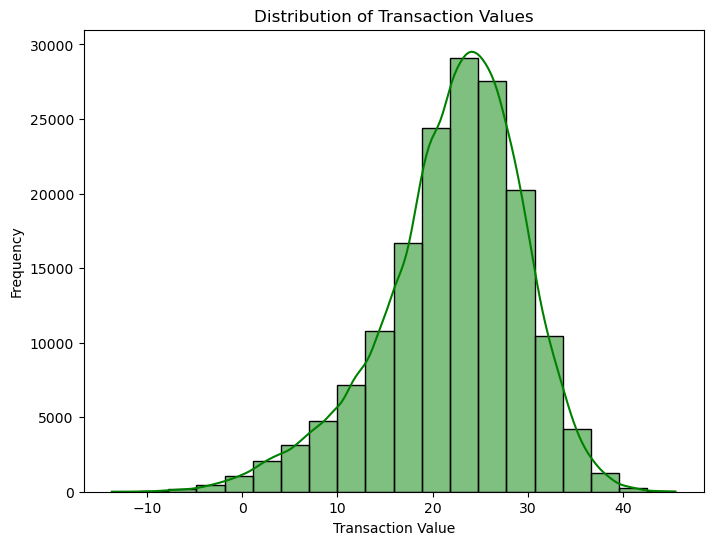

In [17]:
plt.figure(figsize=(8, 6))
sns.histplot(data["Value"], bins=20, kde=True, color="green")
plt.xlabel("Transaction Value")
plt.ylabel("Frequency")
plt.title("Distribution of Transaction Values")
plt.show()

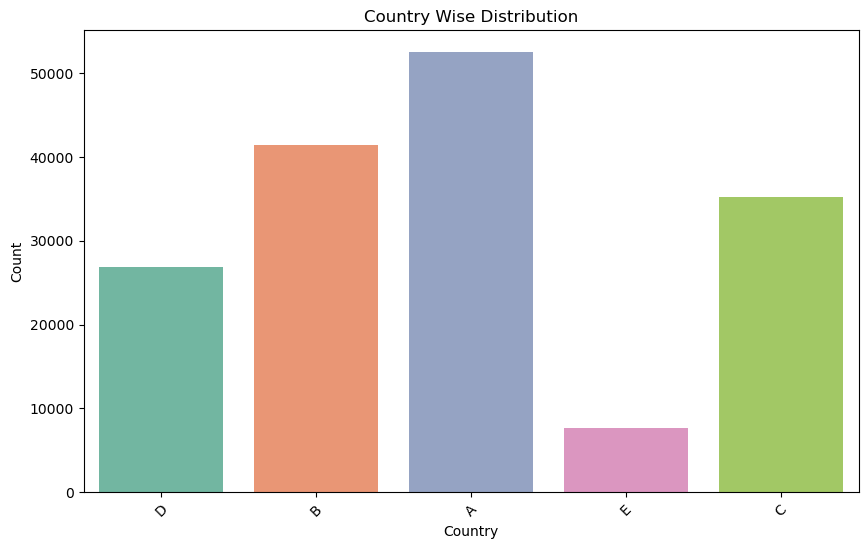

In [124]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Country', data=data, palette='Set2')
plt.title('Country Wise Distribution')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()


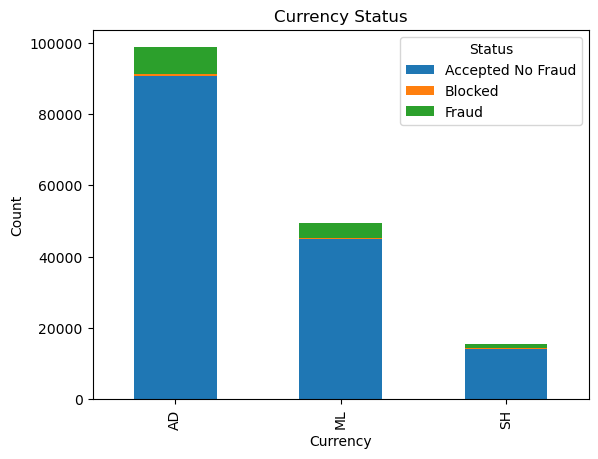

In [22]:
currency_status_data = data.groupby(['Currency', 'Status']).size().unstack()#his groups the data by both ‘Currency’ and ‘Status’ columns and computes the size (count) of each group.
currency_status_data.plot(kind='bar', stacked=True)
plt.title('Currency Status')
plt.xlabel('Currency')
plt.ylabel('Count')
plt.show()

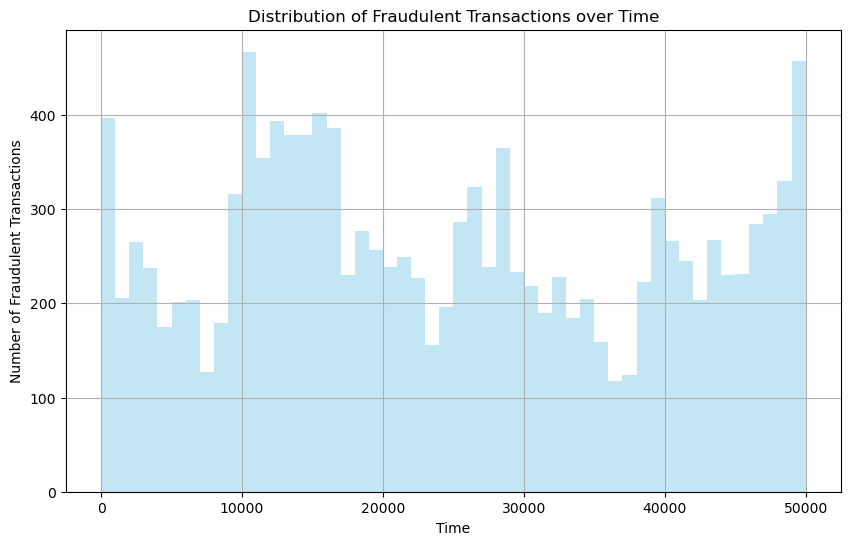

In [24]:
plt.figure(figsize=(10, 6))
data[data['Status']=='Fraud']['Time'].hist(bins=50, alpha=0.5, color='skyblue')
plt.title('Distribution of Fraudulent Transactions over Time')
plt.xlabel('Time')
plt.ylabel('Number of Fraudulent Transactions')
plt.show()

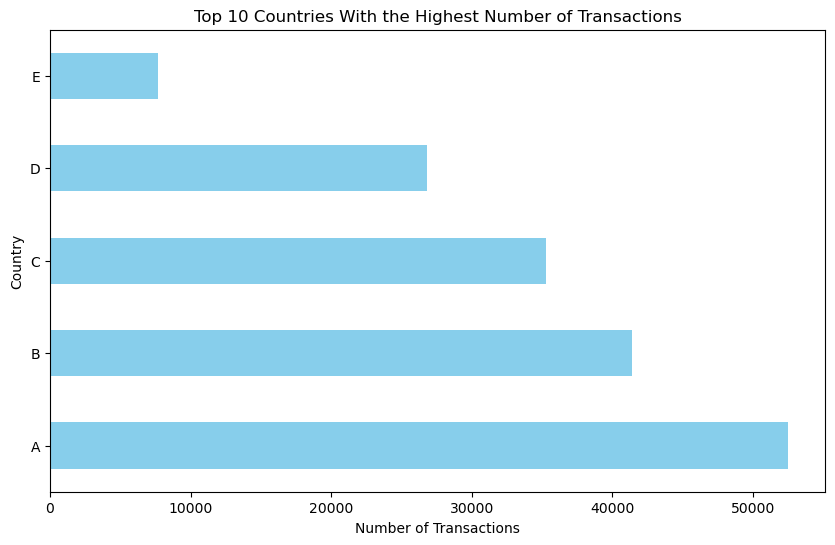

In [123]:
# Get the top 10 countries with the highest number of transactions
top_countries = Country_counts[:10]

# Plotting using a horizontal bar plot
plt.figure(figsize=(10, 6))
top_countries.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 10 Countries With the Highest Number of Transactions')
plt.xlabel('Number of Transactions')
plt.ylabel('Country')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest count at the top
plt.show()

In [29]:
#This groups the data into the columns 'Status' (with the value 'Fraud') and 'Country' and calculates the size (count) of each group. The result is a series of data where each country has the number of fraudulent transactions.
fraud_rates = data[data['Status'] == 'Fraud'].groupby('Country').size()/data.groupby('Country').size() 

In [30]:
print('Country with the highest fraud rate:', fraud_rates.idxmax(), 'Fraud Rate:', fraud_rates.max())
print('Country with the lowest fraud rate:', fraud_rates.idxmin(), 'Fraud Rate:', fraud_rates.min())

Country with the highest fraud rate: D Fraud Rate: 0.1490979573579842
Country with the lowest fraud rate: A Fraud Rate: 0.004361987847387569


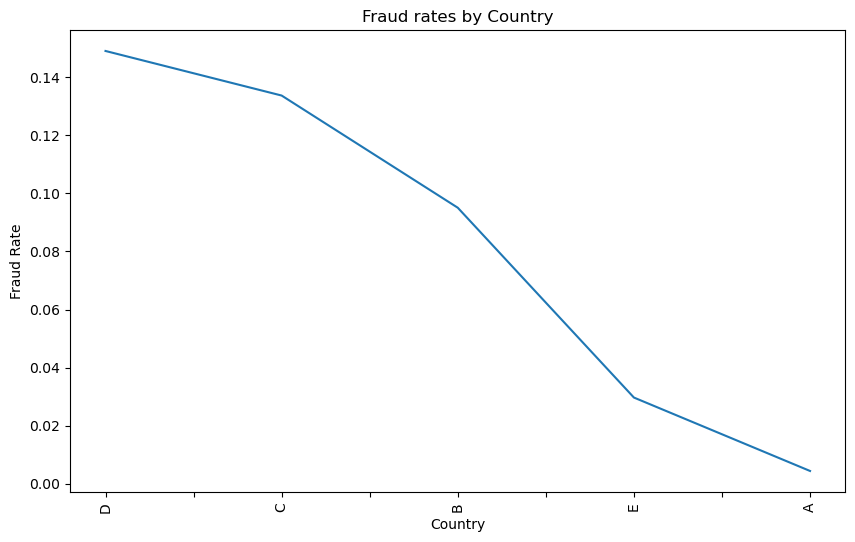

In [31]:
sorted_fraud_rates = fraud_rates.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sorted_fraud_rates.plot(kind='line')
plt.title('Fraud rates by Country')
plt.xlabel('Country')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=90)
plt.show()

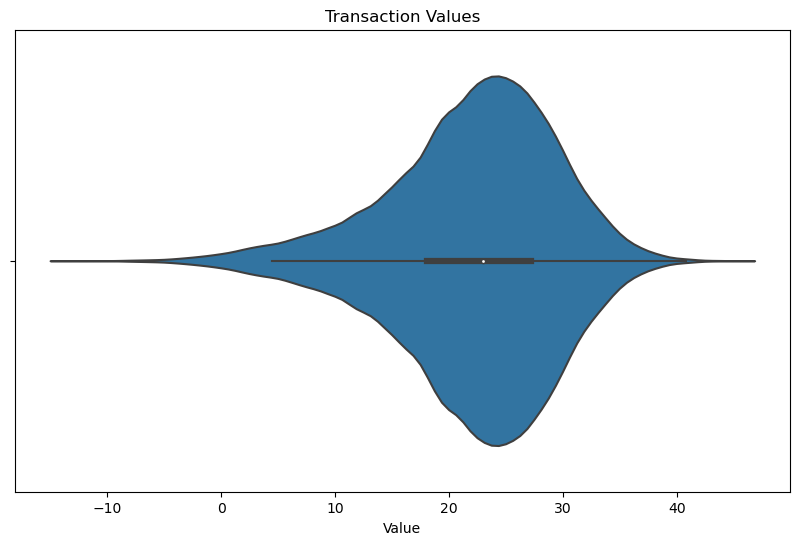

In [33]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=data['Value'])
plt.title('Transaction Values')
plt.xlabel('Value')

plt.show()

In [35]:
avg_value_fraud = data[data['Status'] == 'Fraud']['Value'].mean()
print(avg_value_fraud)

20.28309768931587


In [36]:
avg_value_nonfraud = data[data['Status'] == 'Accepted No Fraud']['Value'].mean()
print(avg_value_nonfraud)

22.266816201333825


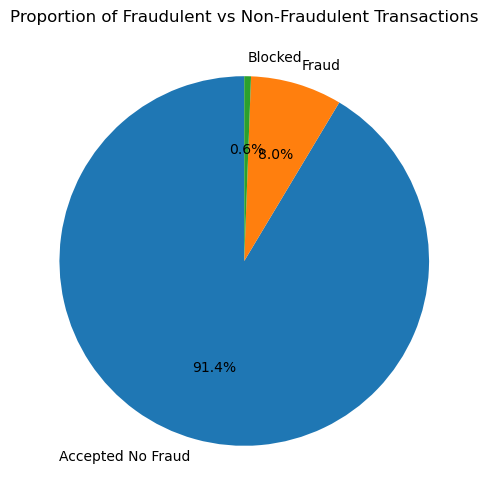

In [37]:
fraud_counts = data['Status'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(fraud_counts, labels=fraud_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Fraudulent vs Non-Fraudulent Transactions')
plt.show()

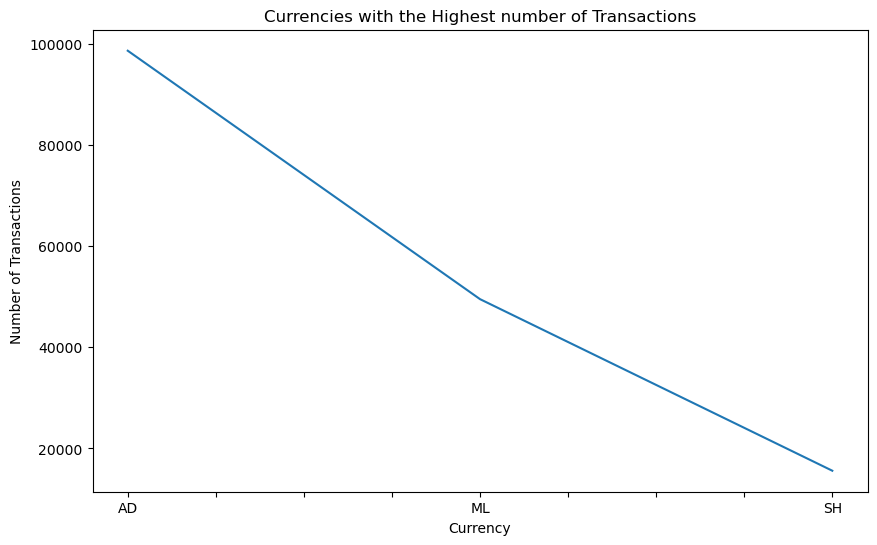

In [38]:
currency_counts = data['Currency']. value_counts()
plt.figure(figsize=(10, 6))
currency_counts[:10].plot(kind='line')
plt.title('Currencies with the Highest number of Transactions')
plt.xlabel('Currency')
plt.ylabel('Number of Transactions')
plt.show()

In [39]:
fraud_rates = data[data['Status'] == 'Fraud'].groupby('Currency').size()/ data.groupby('Currency').size()

print('Currency with the highest fraud rate:', fraud_rates.idxmax(), 'Fraud Rate:', fraud_rates.max())
print('Currency with the lowest fraud rate:', fraud_rates.idxmin(), 'Fraud Rate:', fraud_rates.min())

Currency with the highest fraud rate: ML Fraud Rate: 0.08821331178668822
Currency with the lowest fraud rate: AD Fraud Rate: 0.07649563982964916


In [40]:
corr_matrix = data.corr()
print(corr_matrix)

           Time     Value
Time   1.000000  0.001378
Value  0.001378  1.000000


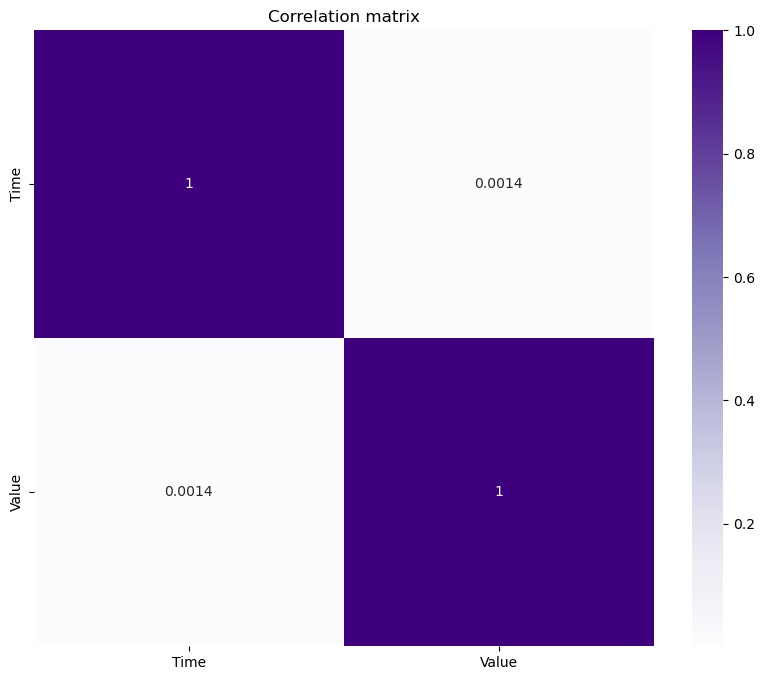

In [122]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Purples')
plt.title('Correlation matrix')
plt.show()

In [47]:
from sklearn.model_selection import train_test_split

X = data.drop('Status', axis=1)
y = data['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Applying One-Hot Encoding to Categorical Variables
X_train_encoded = pd.get_dummies(X_train, columns=['Currency', 'Country'])
X_test_encoded = pd.get_dummies(X_test, columns=['Currency', 'Country'])

#Training a model on encoded data
model.fit(X_train_encoded, y_train)


D:\conda\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
y_pred = model.predict(X_test_encoded)

In [55]:
accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy:', accuracy)


Model accuracy: 0.9148494288681205


In [56]:
from sklearn.ensemble import RandomForestClassifier


In [57]:
rf_model = RandomForestClassifier()

In [64]:
rf_model.fit(X_train_encoded, y_train)

RandomForestClassifier()

In [65]:
rf_y_pred = rf_model.predict(X_test_encoded)

In [60]:
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print('Model accuracy of Random forest:', rf_accuracy)

Model accuracy of Random forest: 0.9366257406389347


In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
dt_model = DecisionTreeClassifier()

In [63]:
dt_model.fit(X_train_encoded, y_train)

DecisionTreeClassifier()

In [66]:
dt_y_pred = dt_model.predict(X_test_encoded)

In [67]:
dt_accuracy = accuracy_score(y_test, dt_y_pred)
print('Model accuracy of decision tree:', dt_accuracy)

Model accuracy of decision tree: 0.918606071712174


In [68]:
from sklearn.ensemble import GradientBoostingClassifier

In [69]:
gb_model = GradientBoostingClassifier()

In [70]:
gb_model.fit(X_train_encoded, y_train)

GradientBoostingClassifier()

In [71]:
gb_y_pred = gb_model.predict(X_test_encoded)

In [72]:
gb_accuracy = accuracy_score(y_test, gb_y_pred)
print('Model accuracy of gradient boosting:', gb_accuracy)

Model accuracy of gradient boosting: 0.9274021134933724


In [77]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

In [78]:
lb = LabelBinarizer()#Creates an instance of the LabelBinarizer.
y_test_bin = lb.fit_transform(y_test)#Applies the binarization to the y_test labels (target values)

In [79]:
logistic_probs = model.predict_proba(X_test_encoded)
rf_probs = rf_model.predict_proba(X_test_encoded)
dt_probs = dt_model.predict_proba(X_test_encoded)
gb_probs = gb_model.predict_proba(X_test_encoded)

In [80]:
logistic_fpr = dict()
logistic_tpr = dict()
logistic_auc = dict()

rf_fpr = dict()
rf_tpr = dict()
rf_auc = dict()

dt_fpr = dict()
dt_tpr = dict()
dt_auc = dict()

gb_fpr = dict()
gb_tpr = dict()
gb_auc = dict()
for i in range(len(lb.classes_)):
    logistic_fpr[i], logistic_tpr[i], _ = roc_curve(y_test_bin[:, i], logistic_probs[:, i])
    logistic_auc[i] = auc(logistic_fpr[i], logistic_tpr[i])
    
    rf_fpr[i], rf_tpr[i], _ = roc_curve(y_test_bin[:, i], rf_probs[:, i])
    rf_auc[i] = auc(rf_fpr[i], rf_tpr[i])
    
    dt_fpr[i], dt_tpr[i], _ = roc_curve(y_test_bin[:, i], dt_probs[:, i])
    dt_auc[i] = auc(dt_fpr[i], dt_tpr[i])
    
    gb_fpr[i], gb_tpr[i], _ = roc_curve(y_test_bin[:, i], gb_probs[:, i])
    gb_auc[i] = auc(gb_fpr[i], gb_tpr[i])

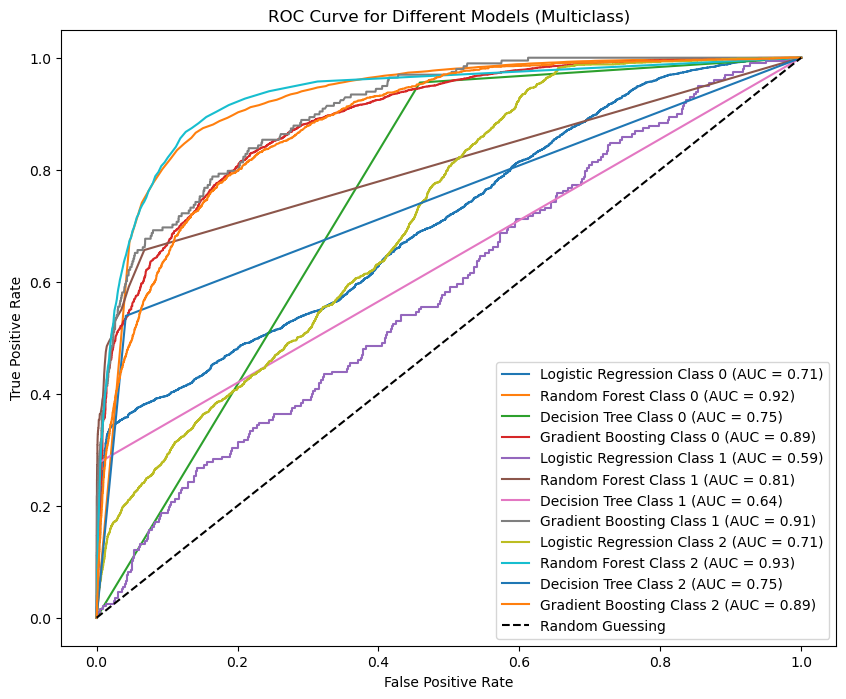

In [81]:
plt.figure(figsize=(10, 8))
for i in range(len(lb.classes_)):
    plt.plot(logistic_fpr[i], logistic_tpr[i], label=f'Logistic Regression Class {i} (AUC = {logistic_auc[i]:.2f})')
    plt.plot(rf_fpr[i], rf_tpr[i], label=f'Random Forest Class {i} (AUC = {rf_auc[i]:.2f})')
    plt.plot(dt_fpr[i], dt_tpr[i], label=f'Decision Tree Class {i} (AUC = {dt_auc[i]:.2f})')
    plt.plot(gb_fpr[i], gb_tpr[i], label=f'Gradient Boosting Class {i} (AUC = {gb_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Models (Multiclass)')
plt.legend()
plt.show()

In [86]:
def transaction_monitoring(transaction_data):
    # Analyze transaction data to detect suspicious patterns
    suspicious_transactions = []
    for transaction in transaction_data:
        # ПWe check various criteria, such as amount, time, place, etc.
        if transaction['amount'] > 1000 and transaction['location'] == 'overseas':
            suspicious_transactions.append(transaction)
    return suspicious_transactions

In [87]:
transaction_data = [
    {'amount': 500, 'location': 'local'},
    {'amount': 2000, 'location': 'overseas'},
    {'amount': 1500, 'location': 'local'},
    {'amount': 300, 'location': 'overseas'}
]

In [88]:
suspicious_transactions = transaction_monitoring(transaction_data)
print("Suspicious transactions:", suspicious_transactions)

Suspicious transactions: [{'amount': 2000, 'location': 'overseas'}]


In [103]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder


In [105]:
def biometric_authentication(fingerprint_scan):
    # Fingerprint verification
    if fingerprint_scan == 'valid':
        return True
    else:
        return False

In [106]:
fingerprint_scan = 'valid'  # Fingerprint scan result
is_authenticated = biometric_authentication(fingerprint_scan)
print("Authentication was successful:", is_authenticated)

Authentication was successful: True


In [117]:
import os

def update_security_system():
    # Print a message indicating that the update process is starting
    print("Starting security system update...")

    # Code to update software and security systems
    os.system("apt-get update")  # Example update command for Linux
    os.system("apt-get upgrade") # Example upgrade command for Linux
    # Other update commands for different operating systems may vary

    # Print a message indicating that the update process is complete
    print("Security system update complete.")

# Call the function to update the security system
update_security_system()

Starting security system update...
Security system update complete.
